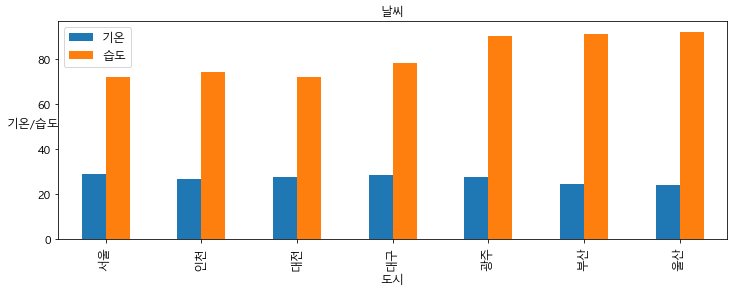

In [26]:
import requests                  # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup    # HTML을 파싱하는 모듈
 
# 웹 페이지를 가져온 뒤 BeautifulSoup 객체로 만듦
response = requests.get('https://www.weather.go.kr/w/obs-climate/land/city-obs.do?auto_man=m&stn=0&dtm=&type=t99&reg=100&tm=2022.07.25.20%3A00')
soup = BeautifulSoup(response.content, 'html.parser')
 
table = soup.find('table', { 'class': "table-col" })  

data = []                           
for tr in table.find_all('tr'):      
    tds = list(tr.find_all('td'))   
                                    
    for td in tds:                 
        if td.find('a'):           
            point = td.find('a').text  
            temperature = tds[5].text    
            humidity = tds[9].text      
            data.append([point, temperature, humidity])    
 
data  

with open('weather.csv','w')as file:
    file.write('point,temperature,humidity\n')
    for i in data:
        file.write('{0},{1},{2}\n'.format(i[0], i[1], i[2]))
        
        
# %matplotlib inline을 설정하면 matplotlib.pyplot의 show 함수를 호출하지 않아도
# 주피터 노트북 안에서 그래프가 표시됨        
%matplotlib inline       
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
 
# csv 파일을 읽어서 DataFrame 객체로 만듦. 인덱스 컬럼은 point로 설정
df = pd.read_csv('weather.csv', index_col='point',encoding='euc-kr')
df  


#특별시와 광역시만 모아서 DataFrame 객체로 만들기
city_df = df.loc[['서울', '인천', '대전', '대구', '광주', '부산', '울산']]
city_df


# Windows 한글 폰트 설정
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
 
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = city_df.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)          # x축 정보 표시
ax.set_ylabel('기온/습도', fontsize=12,rotation=360)     # y축 정보 표시
ax.legend(['기온', '습도'], fontsize=12)    # 범례 지정
